In [1]:
from common import NWSL, Data, Colors, Fonts, Images, add_twitter_handle
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/2024_draft_data.csv")
df["color"] = df["team"].apply(NWSL.color)
df.head()

,year,round,pick,name,school,division,conference,team,signed,minutes,mins_through_10,color
0,2024,1,1,Ally Sentnor,University of North Carolina,NCAA D1,ACC,UTA,True,True,890,#FCB81A
1,2024,1,2,Savy King,University of North Carolina,NCAA D1,ACC,BAY,True,True,730,#F0524D
2,2024,1,3,Croix Bethune,University of Georgia,NCAA D1,SEC,WAS,True,True,857,#000000
3,2024,1,4,Brecken Mozingo,Brigham Young University,NCAA D1,WCC,UTA,True,True,358,#FCB81A
4,2024,1,5,Hal Hershfelt,Clemson University,NCAA D1,ACC,WAS,True,True,848,#000000


<Figure size 1008x864 with 0 Axes>

<Figure size 5600x4800 with 0 Axes>

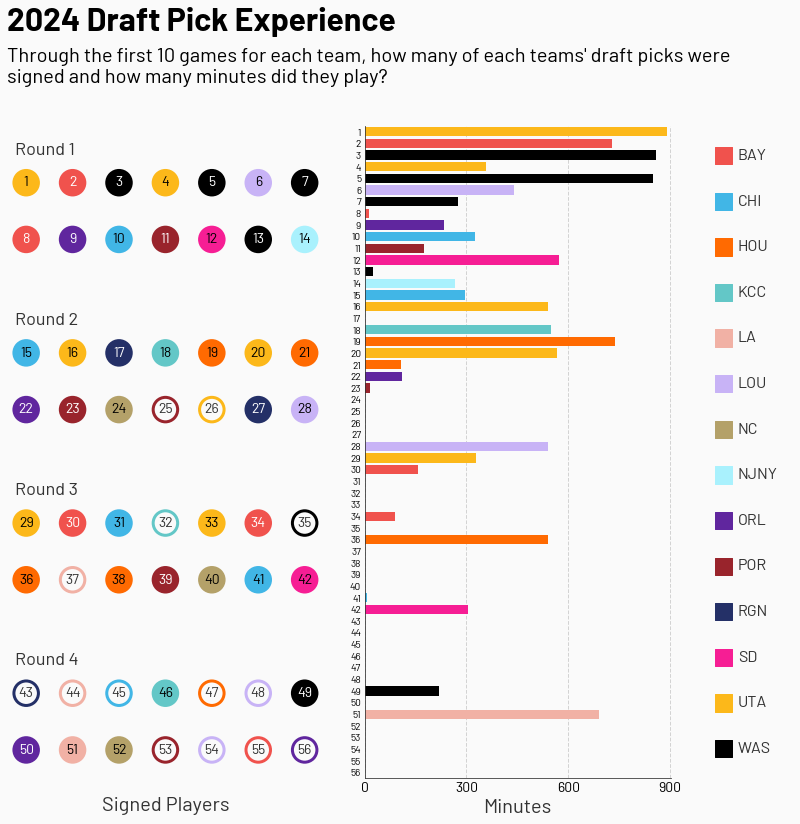

In [55]:
# General
plt.clf()
plt.rcParams["figure.figsize"] = (14, 12)
plt.figure(dpi=400, facecolor=Colors.WHITE)

COLS = 3
fig, axs = plt.subplots(1, COLS, gridspec_kw={"width_ratios": [4, 4, 1]})
fig.patch.set_facecolor(Colors.WHITE)

for i in range(0, COLS):
    ax = axs[i]
    ax.set_facecolor(Colors.WHITE)

    if i == 1:
        # Plot minutes by pick
        ax.barh(df["pick"], df["mins_through_10"], color=df["color"])

        # Title
        ax.set_xlabel(
            "Minutes", fontproperties=Fonts.BARLOW, size=20, color=Colors.BLACK
        )

        # Limits
        ax.set_ylim([df["pick"].max() + 0.5, df["pick"].min() - 0.5])
        ax.set_xlim([0, 902])

        # Ticks
        ax.set_xticks([0, 300, 600, 900])
        ax.set_yticks(range(1, df["pick"].max() + 1))
        for label in ax.get_yticklabels() + ax.get_xticklabels():
            label.set_fontproperties(Fonts.BARLOW)
        ax.tick_params(axis="x", which="both", length=0, labelsize=14)
        ax.tick_params(axis="y", which="both", length=0, labelsize=10)

        # Axes
        ax.spines[["right", "top"]].set_visible(False)
        ax.spines[["bottom", "left"]].set_color(Colors.BLACK)
        ax.set_axisbelow(True)
        ax.grid(axis="x", which="both", ls="--", color=Colors.LIGHT_GRAY, linewidth=1)
    elif i == 0:
        # Plot signed players
        fill = df.apply(
            lambda row: row["color"] if row["signed"] else Colors.WHITE, axis=1
        )
        x = df["pick"].sub(1).mod(7)
        y = df["pick"].sub(1).floordiv(7) + df["pick"].sub(1).floordiv(14)
        ax.scatter(x, y, edgecolor=df["color"], color=fill, s=600, linewidths=3)
        for i, row in df.iterrows():
            color = Colors.BLACK if not row["signed"] else NWSL.text_color(row["team"])
            ax.annotate(
                row["pick"],
                (x[i], y[i]),
                ha="center",
                va="center",
                color=color,
                fontproperties=Fonts.BARLOW,
                fontsize=14,
            )

        # Title
        ax.set_xlabel(
            "Signed Players",
            fontproperties=Fonts.BARLOW,
            size=20,
            color=Colors.BLACK,
            labelpad=15,
        )

        # Labels
        for i in range(1, 5):
            ax.text(
                -0.25,
                (i - 1) * 3 - 0.5,
                "Round " + str(i),
                fontproperties=Fonts.BARLOW,
                size=18,
                color=Colors.BLACK,
            )

        # Limits
        ax.set_ylim([10.5, -1])

        # Ticks
        ax.set_yticks([])
        ax.set_xticks([])

        # Axes
        ax.spines[["right", "top", "left", "bottom"]].set_visible(False)
    elif i == 2:
        # Legend
        teams = sorted(df["team"].unique())
        ax.scatter(
            [0] * len(teams),
            range(0, len(teams)),
            color=list(map(NWSL.color, teams)),
            s=300,
            clip_on=False,
            marker="s",
        )
        for i, team in enumerate(teams):
            ax.annotate(
                team,
                (0.1, i),
                ha="left",
                va="center",
                color=Colors.BLACK,
                fontproperties=Fonts.BARLOW,
                fontsize=16,
            )

        ax.set_xlim([-0.05, 0.5])
        ax.axis("off")
        ax.invert_yaxis()

# Title
plt.figtext(
    0.12,
    0.99,
    "2024 Draft Pick Experience",
    fontproperties=Fonts.BARLOW_BOLD,
    size=32,
    ha="left",
)

# Subtitle
plt.figtext(
    0.12,
    0.93,
    "Through the first 10 games for each team, how many of each teams' draft picks were\nsigned and how many minutes did they play?",
    fontproperties=Fonts.BARLOW,
    size=20,
    ha="left",
)

# Save image
plt.savefig("images/2024_draft_pick_experience.png", bbox_inches="tight", pad_inches=0.5, dpi=400)